Scikit-learn Linear Regression Results
Training Time: 0.1544 seconds
MAE:  50413.43
RMSE: 69297.72
R² Score: 0.6488


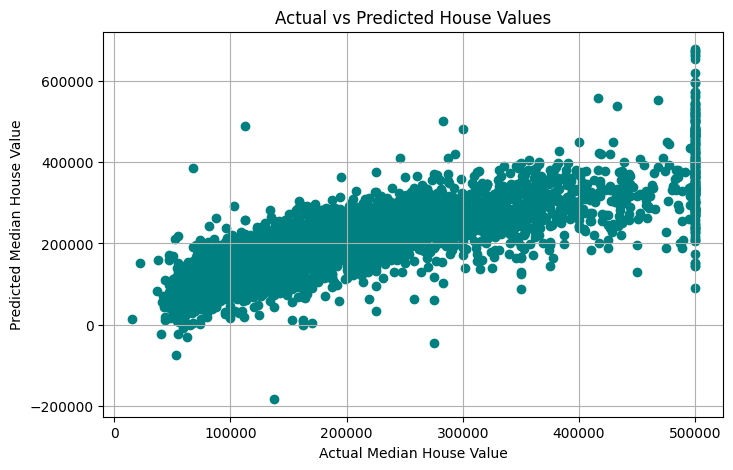

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


df = pd.read_csv(r"C:\myfiles\sem4\housing.csv")
df.dropna(inplace=True)
df = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True)
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

model = LinearRegression()
start_time = time.time()
model.fit(X_train, y_train)
training_time = time.time() - start_time

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Scikit-learn Linear Regression Results")
print(f"Training Time: {training_time:.4f} seconds")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=1, color='teal')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted House Values")
plt.grid(True)
plt.show()
